<a href="https://colab.research.google.com/github/varunck2601/Hotel-Booking-Analysis/blob/main/hotel_booking_analysis_Varun_CK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

Explore and analyze the data to discover important factors that govern the bookings

**Performing EDA of Hotel Booking Analysis with Python to get insights from the data**


 **Importing necessary packages and importing the dataset from Google drive.** 


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as mtick
import os

#To display maxium columns of the dataset
pd.options.display.max_columns = None

In [92]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
#Displaying first 5 rows of dataset
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [94]:
#Displaying last 5 rows of dataset
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made,arrival date, length of stay, the number of adults, children, and/or babies,meals opted and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. The time period of the dataset is between 2015-2017.

In [55]:
data.shape

(119390, 32)

The dataset contains 119390 rows and 32 columns


In [56]:
# Creating a copy of dataframe 
data = data.copy()

now **Cleaning the data** in several steps
1)Removing duplicate rowa
2)Handling missing values
3)Converting columns to appropriate datatypes
4)Adding important columns to data 

In [57]:
# looking for duplicate rows and column
data[data.duplicated()].shape



(31994, 32)

In [58]:
#Dropping the duplicate values
data.drop_duplicates(inplace = True)

In [59]:
#now checking the shape of the data
data.shape

(87396, 32)

In [60]:
# Finding the missing value, showing the total null values for each column and sorting it in descending order
data.isnull().sum().sort_values(ascending=False)[:12]

company                   82137
agent                     12193
country                     452
children                      4
reserved_room_type            0
assigned_room_type            0
booking_changes               0
deposit_type                  0
hotel                         0
previous_cancellations        0
days_in_waiting_list          0
customer_type                 0
dtype: int64

Here  there are 4 features with missing values.

In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.

In [61]:
# If no id of agent or company is null, just replace it with 0
data[['agent','company']] = data[['agent','company']].fillna(0.0)

Children column contains the count of children, so we will replace all the missing values with the rounded mean value and  country column contains country codes representing different countries. It is a categorical feature so I will also replace it with the mode value. The mode value is the value that appears more than any other value. So, in this case, I am replacing it with the country that appears the most often.



In [62]:
#For the missing values in the country column, replace it with mode (value that appears most often)
data['country'].fillna(data.country.mode().to_string(), inplace=True)


## for missing children value, replace it with rounded mean value
data['children'].fillna(round(data.children.mean()), inplace=True)


There are many rows that have zero guests including adults, children and babies. These type of rows does not make any sense so we shall see the number of rows and columns



In [63]:
data[(data.adults+data.babies+data.children)==0].shape

(166, 32)

There are 180 rows so we will delete those rows

In [64]:
# Dropping Rows where there is no adult, baby and child
df = data.drop(data[(data.adults+data.babies+data.children)==0].index)

#**Converting the datatype**

we shall check the datatype of each column in our dataset.

In [65]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

here there are different data types for different columns.

There are some columns like children, company, and agent, that are float type but their values are only in integers.

So we will convert them to the integer type.

In [66]:
# converting datatype of these columns from float to integer
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [67]:
# changing 'reservation_status_date' to data_type.
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], format = '%Y-%m-%d')


In [68]:
#Adding total staying days in hotels
data['total_stay'] = data['stays_in_weekend_nights']+data['stays_in_week_nights']

In [69]:
#adding total people number as column.
data['total_people'] = data['adults']+data['children']+data['babies']

#**Exploratory Data Analysis (EDA)**

(1) We shall find the correlation between the numerical data.

here the  columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type. do they are not necessarry foe the corelation matrix.

In [70]:
num_data = data[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]

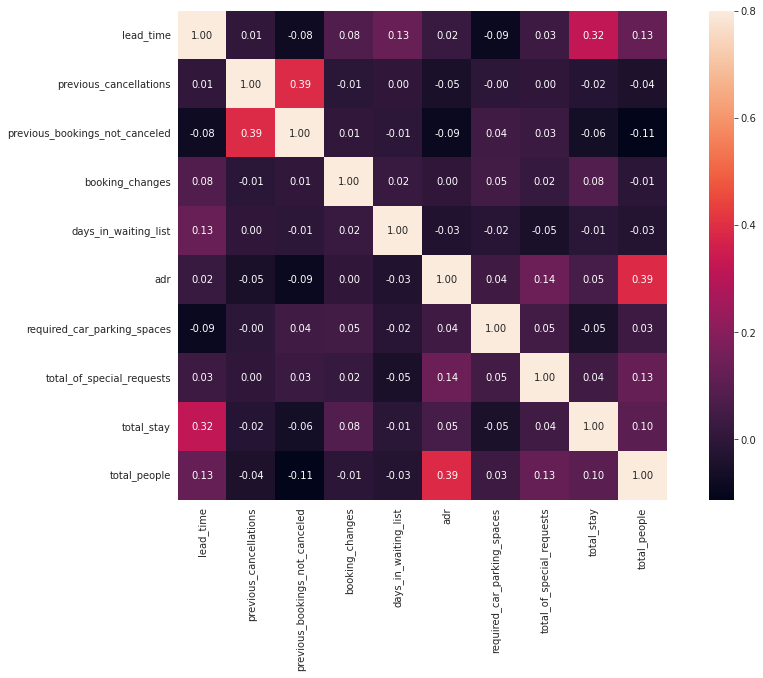

In [71]:
#correlation matrix
cm= num_data.corr()
f, ax = plt.subplots(figsize=(15,9))
sns.heatmap(cm,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);


*) Total stay length and lead time have some slight correlation. This shows that for longer hotel stays people generally plan less before they actual arrive for the hotel.

*) adr is slightly correlated with total_people,this tells us that more number of people means more revenue, therefore more adr.

(2)Now lets check how the length of stay affects the adr.

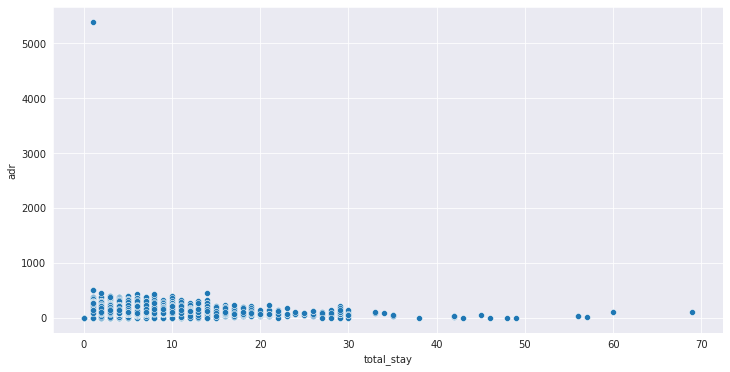

In [72]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = data)
plt.show()

(3)There are outliner in adr ,so we will remove that fot better scatter plot

In [73]:
data.drop(data[data['adr'] > 1000].index, inplace = True)

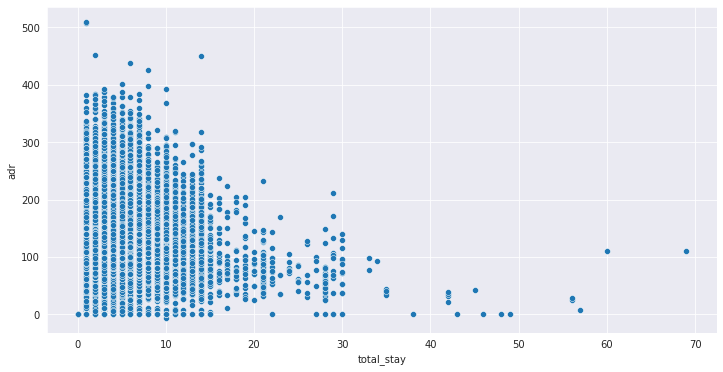

In [74]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = data)
plt.show()

here we can see from the scatter plot that as length of the total_stay increases and adr decreases,this tells tht for longer stay ,the better deal for customer can be seen .

(4)now lets see the comparision between the adr vs arrival_date_month through box plot

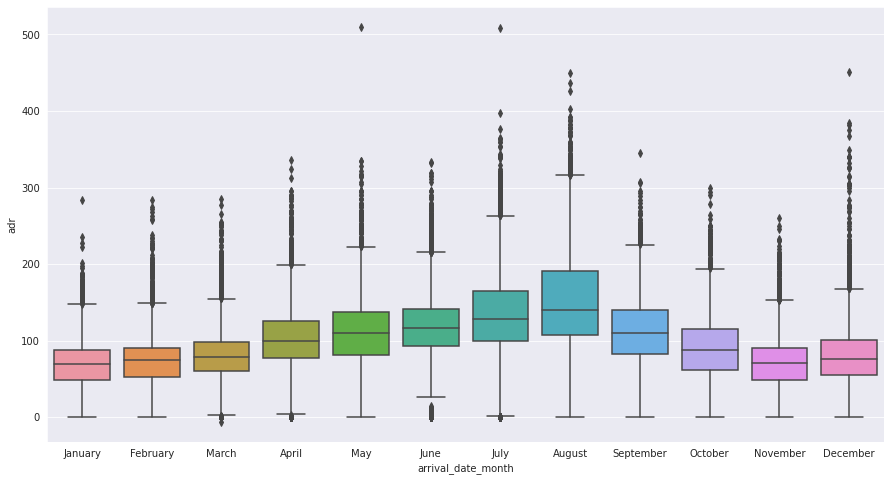

In [75]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
data['arrival_date_month'] = pd.Categorical(data['arrival_date_month'],categories=reindex,ordered=True)
plt.figure(figsize = (15,8))
sns.boxplot(x = data['arrival_date_month'],y = data['adr'])
plt.show()

The adr is most in the month of August

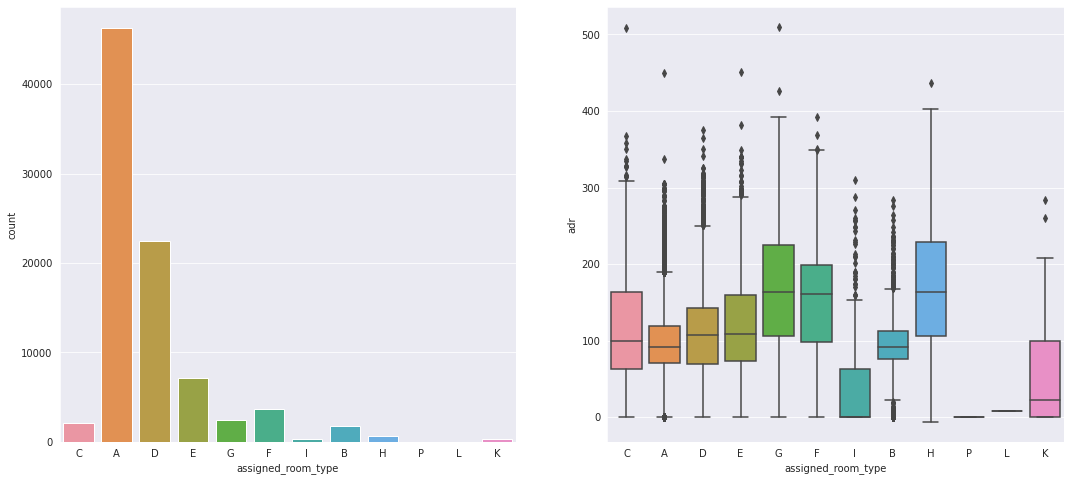

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = data.groupby('assigned_room_type')
data['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = data['assigned_room_type'])
sns.boxplot(ax = axes[1], x = data['assigned_room_type'], y = data['adr'])
plt.show()

(5)Now we shall see which type of meal is most preferred bt the customers .

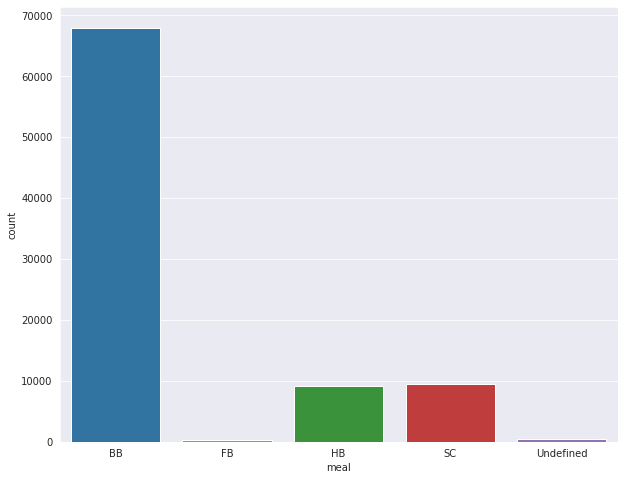

In [77]:
plt.figure( figsize=(10, 8))
sns.countplot(x = data['meal'])
plt.show()

The most preferred meal type is BB

#**Hotel Wise Analysis**

(6)Checking the revenue of the hotels.

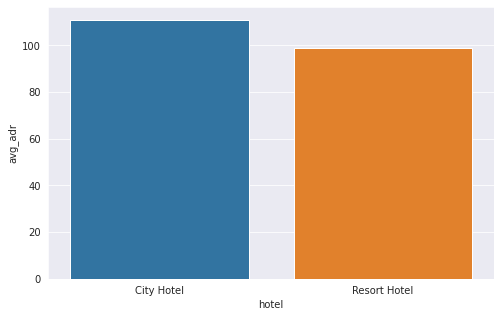

In [78]:
#revenue of hotels and calculating average adr

grouped_by_hotel = data.groupby('hotel')
d1 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['avg_adr'] )
plt.show()

City Hotel gives more revenue than the resort hotel


(7)Now lets see the percentage of hotel booking.

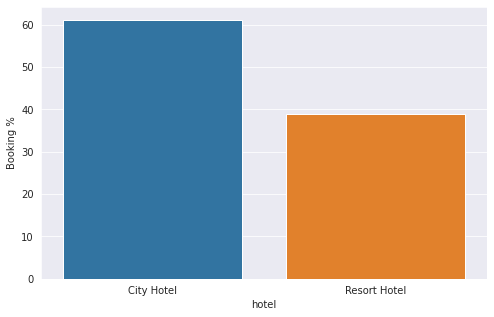

In [79]:
#Calculating percentage
d2= pd.DataFrame((grouped_by_hotel.size()/data.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d2['hotel'], y = d2['Booking %'] )
plt.show()

Here city hotel booking gives 65% and resort hotel booking is around 30%

(8) we will see the most preferred stay length in each of the hotels

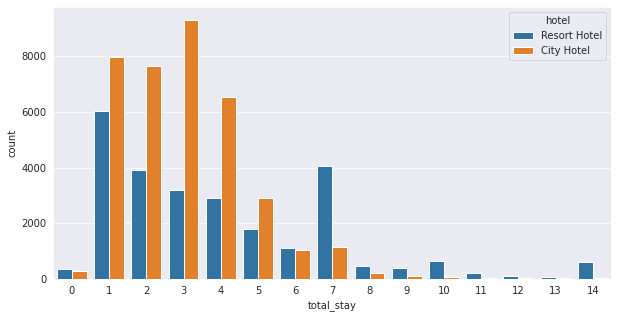

In [80]:
not_canceled = data[data['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

Here we can see that most common stay is less than four days and people likely prefer to stay in the city hotel for short time and for long stay prople prefer Resort Hotel.

(9)Let's check which hotel has the longer waiting time

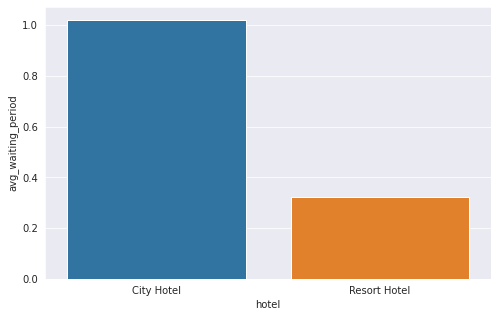

In [81]:
d3 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_waiting_period'] )
plt.show()

City Hotel has longer waiting time

(10)Lets see which hotel has higher lead time 

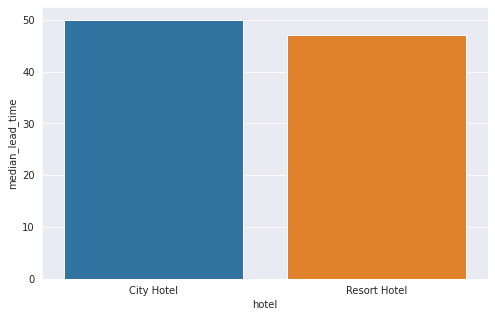

In [82]:
d4 =grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = d4['hotel'], y = d4['median_lead_time'] )
plt.show()

Here we can see that city hotel has higher lead time

#**How Many Booking Were Cancelled?**

(11)Let’s write the function to get the percentage of different values.

In [83]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [84]:
x,y = get_count(data['is_canceled'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


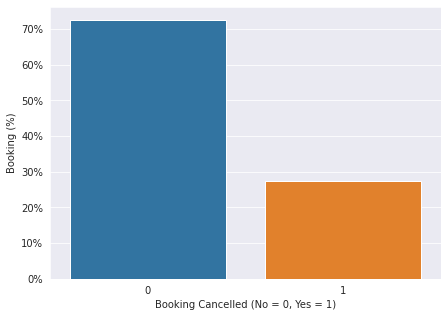

In [85]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
        
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')



Bookings got canceled 30% of the time. While booking guest did not cancel the booking almost 70% of the time.

(12)Let's see what is the percentage of booking for each year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


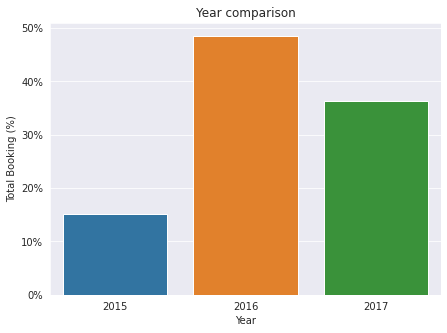

In [86]:
x,y = get_count(data['arrival_date_year'])
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison')

More than the double bookings were made in 2016 compared to the previous year .But the bookings got Decreased by almost 15% the next year

#**Distribution wise analysis**

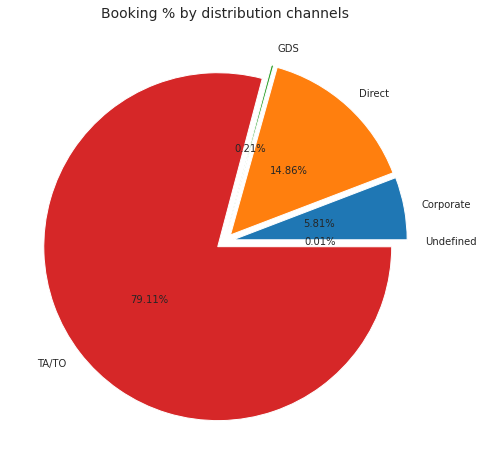

In [87]:
# common channeel for booking the hotel
group_by_dc = data.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/data.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

TA/TO is the most common channel used for the booking

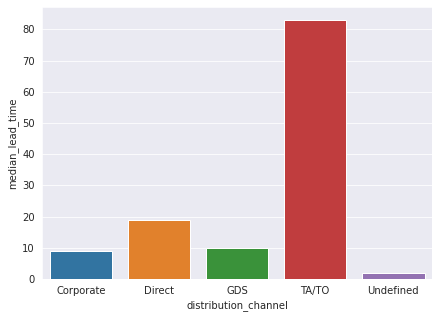

In [95]:
# mostly used for early booking of hotel.
group_by_dc = data.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()

The most of the guest are making more reservation through TA/TO channels which is travel agency and tour operator. 


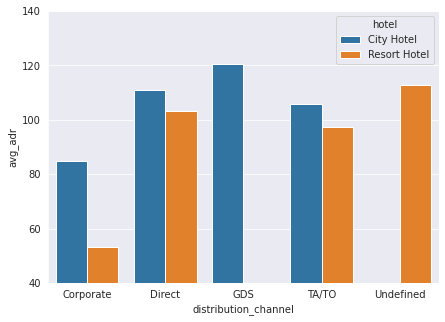

In [96]:
group_by_dc_hotel = data.groupby(['distribution_channel', 'hotel'])
d3 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d3['distribution_channel'], y = d3['avg_adr'], hue = d3['hotel'])
plt.ylim(40,140)
plt.show()

for GDS , City hotel gives higher revenue and for the Resort hotel ,undefined distribution channel gives more revenue.

For early booking TA/TO is the mostly used booking channel

(13)Now lets check which is the busiest month for hotels.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


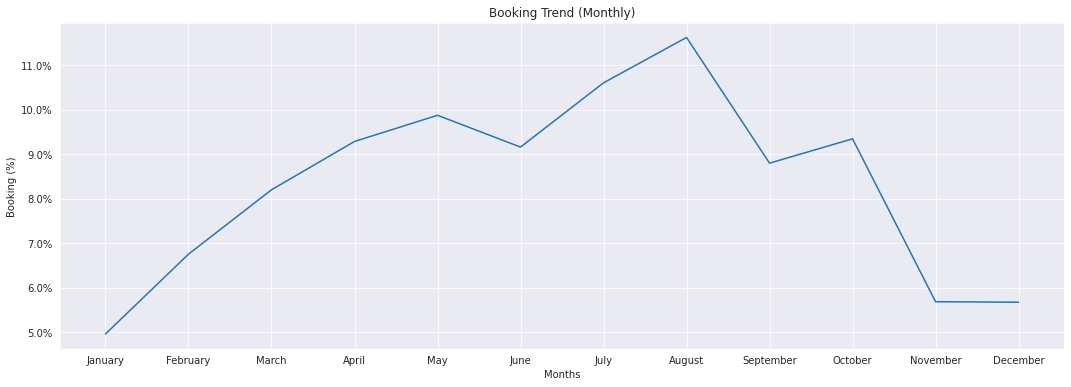

In [97]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = data['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100


#sns.lineplot(x, y.values)
plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))

As we can see here most bookings were made from July to August. And the least bookings were made at the start and end of the year.

#**Country Wise Guest**

In [98]:
country_wise_guests = data[data['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


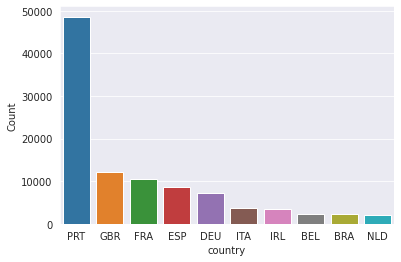

In [99]:
grouped_by_country = data.groupby('country')
d1 = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = d1['country'], y  = d1['Count'])
plt.show()

Portugal has highest number of guest arrival

(14)Let's see the number of days people stay at hotel 

In [100]:
filter = data['is_canceled'] == 0
data = data[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [101]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [102]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


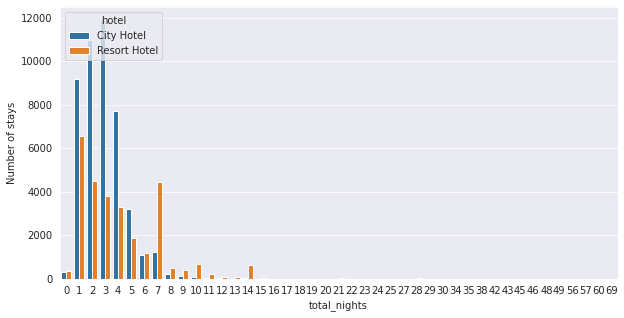

In [103]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'total_nights', y = 'Number of stays',data= stay,hue='hotel')

#**Booking Cancelation Analysis**

lets see the highest booking cancelation

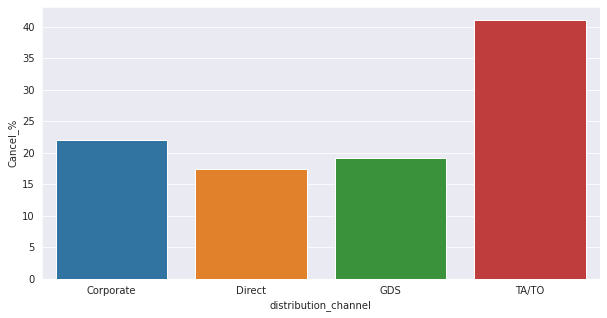

In [104]:
A = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = A.index, y = A['Cancel_%'])
plt.show()

Most people prefer to stay at the hotels less than 5 days

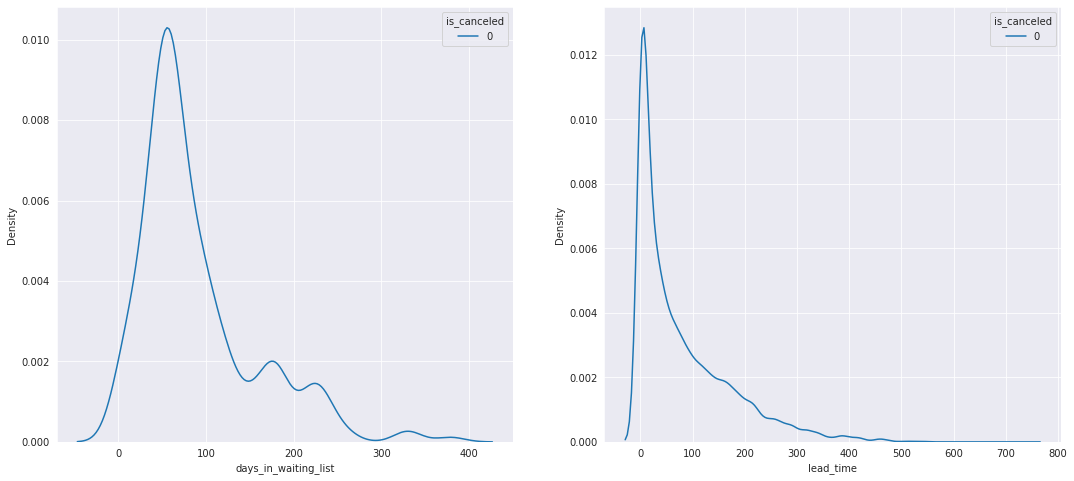

In [105]:
 # Selecting bookings with non zero waiting time
waiting_bookings = data[data['days_in_waiting_list'] !=0]  

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = data['lead_time'], hue = data['is_canceled'])
plt.show()

Most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings. Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cncelation are similar for lead time too.